In [1]:
from sklearn.datasets import make_blobs

from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

In [2]:
data_train = pd.read_csv("./train.csv")
data_test = pd.read_csv("./test.csv")
print("Shape of Training Data:", data_train.shape)
print("Shape of Test Data:", data_test.shape)
test_EmpId = {}
test_EmpId = data_test["Employee ID"]
data_train.head()

Shape of Training Data: (22750, 9)
Shape of Test Data: (12250, 8)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Happiness
0,fffe32003000360033003200,9/30/08,Female,Service,No,2,3.0,3.8,0.84
1,fffe3700360033003500,11/30/08,Male,Service,Yes,1,2.0,5.0,0.64
2,fffe31003300320037003900,3/10/08,Female,Product,Yes,2,NaN,5.8,0.51
3,fffe32003400380032003900,11/3/08,Male,Service,Yes,1,1.0,2.6,0.80
4,fffe31003900340031003600,7/24/08,Female,Service,No,3,7.0,6.9,0.48


In [3]:
data_test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,12/10/08,Female,Service,No,2,5,7.7
1,fffe31003300310037003800,8/14/08,Female,Product,Yes,1,2,5.2
2,fffe33003400380035003900,11/13/08,Male,Product,Yes,1,3,5.9
3,fffe3100370039003200,2/7/08,Female,Service,No,3,6,4.6
4,fffe32003600390036003700,7/17/08,Female,Product,No,2,5,6.4


In [4]:
data_train['HappyCond'] = np.where(data_train["Happiness"]>=0.5,1,0)
data_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Happiness,HappyCond
0,fffe32003000360033003200,9/30/08,Female,Service,No,2,3.0,3.8,0.84,1
1,fffe3700360033003500,11/30/08,Male,Service,Yes,1,2.0,5.0,0.64,1
2,fffe31003300320037003900,3/10/08,Female,Product,Yes,2,NaN,5.8,0.51,1
3,fffe32003400380032003900,11/3/08,Male,Service,Yes,1,1.0,2.6,0.80,1
4,fffe31003900340031003600,7/24/08,Female,Service,No,3,7.0,6.9,0.48,0


In [5]:
print(data_train.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Happiness             21626 non-null  float64
 9   HappyCond             22750 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0

In [6]:
import datetime as dt

data_train["Date of Joining"] =  pd.to_datetime(data_train["Date of Joining"])
data_test["Date of Joining"] =  pd.to_datetime(data_test["Date of Joining"])
data_train.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Happiness                      float64
HappyCond                        int64
dtype: object

In [7]:
dt_today = dt.date.today()
data_train["today"]=dt_today
data_test["today"]=dt_today
data_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Happiness,HappyCond,today
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.84,1,2021-12-09
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.64,1,2021-12-09
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.51,1,2021-12-09
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.80,1,2021-12-09
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.48,0,2021-12-09


In [8]:
data_train["today"] =  pd.to_datetime(data_train["today"])
data_test["today"] =  pd.to_datetime(data_test["today"])

In [9]:
data_train['tenure'] = data_train['today'] - data_train["Date of Joining"]
data_test['tenure'] = data_test['today'] - data_test["Date of Joining"]
data_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Happiness,HappyCond,today,tenure
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.84,1,2021-12-09,4818 days
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.64,1,2021-12-09,4757 days
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.51,1,2021-12-09,5022 days
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.80,1,2021-12-09,4784 days
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.48,0,2021-12-09,4886 days


In [10]:
data_train.dtypes

Employee ID                      object
Date of Joining          datetime64[ns]
Gender                           object
Company Type                     object
WFH Setup Available              object
Designation                       int64
Resource Allocation             float64
Mental Fatigue Score            float64
Happiness                       float64
HappyCond                         int64
today                    datetime64[ns]
tenure                  timedelta64[ns]
dtype: object

In [11]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

data_train['tenure'] = data_train['tenure'].astype(int)
data_test['tenure'] = data_test['tenure'].astype(int)
data_train.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Happiness                      float64
HappyCond                        int64
today                   datetime64[ns]
tenure                           int64
dtype: object

In [12]:
data_test.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation              int64
Mental Fatigue Score           float64
today                   datetime64[ns]
tenure                           int64
dtype: object

In [13]:
data_train = data_train.drop(["Employee ID", "Date of Joining", "today"], axis=1)
data_test = data_test.drop(["Employee ID", "Date of Joining", "today"], axis=1)
print(data_train.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                22750 non-null  object 
 1   Company Type          22750 non-null  object 
 2   WFH Setup Available   22750 non-null  object 
 3   Designation           22750 non-null  int64  
 4   Resource Allocation   21369 non-null  float64
 5   Mental Fatigue Score  20633 non-null  float64
 6   Happiness             21626 non-null  float64
 7   HappyCond             22750 non-null  int64  
 8   tenure                22750 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                12250 non-null  object 
 1 

In [14]:
# Drop rows where target variable "Happiness" is missing.
data_train = data_train.dropna(subset=['Happiness'])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                21626 non-null  object 
 1   Company Type          21626 non-null  object 
 2   WFH Setup Available   21626 non-null  object 
 3   Designation           21626 non-null  int64  
 4   Resource Allocation   20348 non-null  float64
 5   Mental Fatigue Score  19681 non-null  float64
 6   Happiness             21626 non-null  float64
 7   HappyCond             21626 non-null  int64  
 8   tenure                21626 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


In [15]:
# Impute remaining missing values with medians
df_train = data_train
for col in ['Resource Allocation', 'Mental Fatigue Score']:
    df_train[col] = df_train[col].fillna(df_train[col].median())

df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                21626 non-null  object 
 1   Company Type          21626 non-null  object 
 2   WFH Setup Available   21626 non-null  object 
 3   Designation           21626 non-null  int64  
 4   Resource Allocation   21626 non-null  float64
 5   Mental Fatigue Score  21626 non-null  float64
 6   Happiness             21626 non-null  float64
 7   HappyCond             21626 non-null  int64  
 8   tenure                21626 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


,Designation,Resource Allocation,Mental Fatigue Score,Happiness,HappyCond,tenure
count,21626.000000,21626.000000,21626.000000,21626.000000,21626.000000,2.162600e+04
mean,2.178766,4.455239,5.745154,0.547995,0.602331,4.241064e+17
std,1.135428,1.990000,1.833016,0.198226,0.489428,9.105099e+15
min,0.000000,1.000000,0.000000,0.000000,0.000000,4.083264e+17
25%,1.000000,3.000000,4.700000,0.410000,0.000000,4.162752e+17
50%,2.000000,4.000000,5.900000,0.550000,1.000000,4.240512e+17
75%,3.000000,6.000000,6.900000,0.690000,1.000000,4.320864e+17
max,5.000000,10.000000,10.000000,1.000000,1.000000,4.398624e+17


In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
sns.set(color_codes=True)

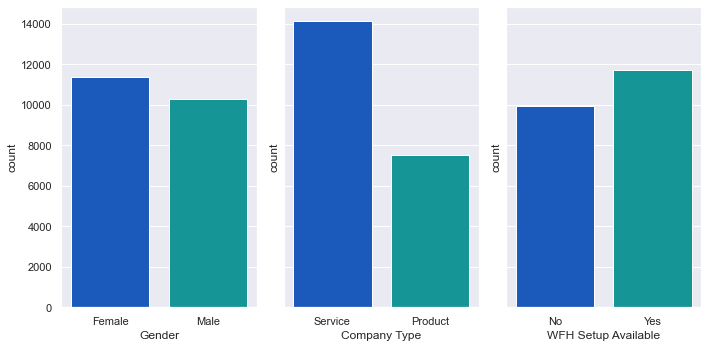

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(10,5))
sns.countplot(df_train["Gender"], palette="winter", ax=ax[0])
sns.countplot(df_train["Company Type"], palette="winter", ax=ax[1])
sns.countplot(df_train["WFH Setup Available"], palette="winter", ax=ax[2])
plt.tight_layout()
plt.show()

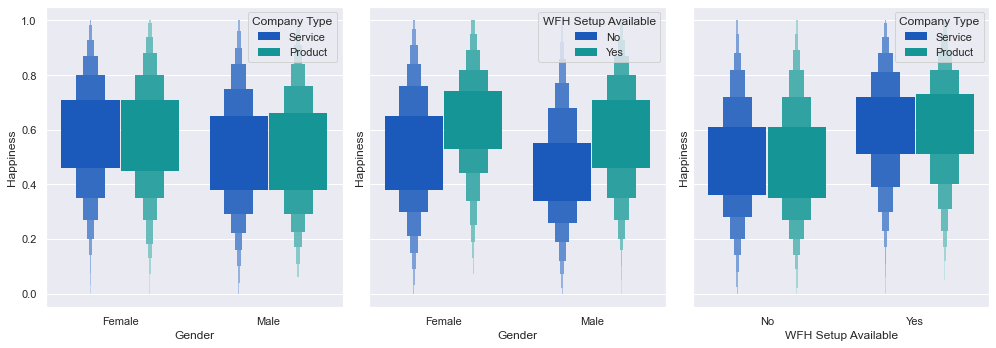

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14,5))
sns.boxenplot(x="Gender", y="Happiness", hue="Company Type", data=df_train, palette="winter", linewidth=0.0, ax=ax[0])
sns.boxenplot(x="Gender", y="Happiness", hue="WFH Setup Available", data=df_train, palette="winter", linewidth=0.0, ax=ax[1])
sns.boxenplot(x="WFH Setup Available", y="Happiness", hue="Company Type", data=df_train, palette="winter", linewidth=0.0, ax=ax[2])
plt.tight_layout()
plt.show()

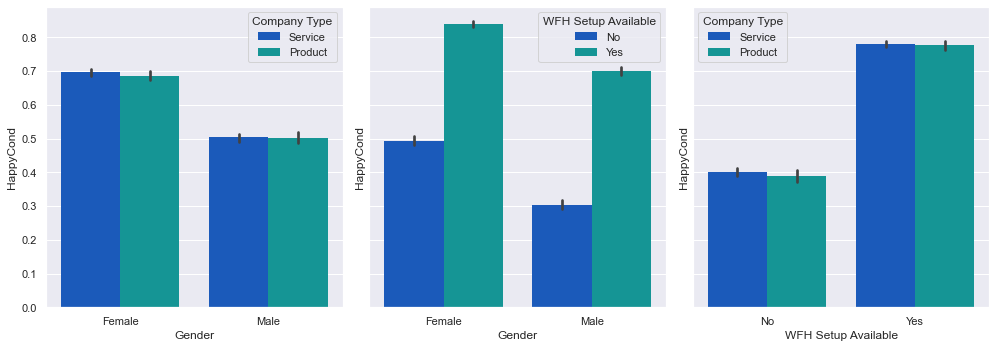

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14,5))
sns.barplot(x="Gender", y="HappyCond", hue="Company Type", data=df_train, palette="winter", linewidth=0.0, ax=ax[0])
sns.barplot(x="Gender", y="HappyCond", hue="WFH Setup Available", data=df_train, palette="winter", linewidth=0.0, ax=ax[1])
sns.barplot(x="WFH Setup Available", y="HappyCond", hue="Company Type", data=df_train, palette="winter", linewidth=0.0, ax=ax[2])
plt.tight_layout()
plt.show()

In [20]:
cont = ["Happiness", "Resource Allocation", "Mental Fatigue Score", "tenure"]
df_cont = df_train[cont]

In [21]:
k = 4
fig = plt.figure(figsize=(14,5))
# Correlations between each variable
corrmat = df_cont.corr()
# Take k elements in descending order of coefficient
cols = corrmat.nlargest(k, "Happiness")["Happiness"].index

<Figure size 1008x360 with 0 Axes>

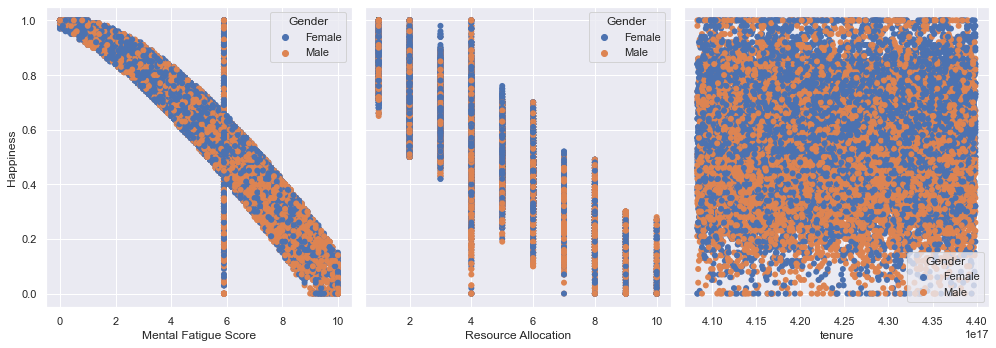

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14,5))
sns.scatterplot(x="Mental Fatigue Score", y="Happiness", hue="Gender", data=df_train, linewidth=0.0, ax=ax[0])
sns.scatterplot(x="Resource Allocation", y="Happiness", hue="Gender", data=df_train, linewidth=0.0, ax=ax[1])
sns.scatterplot(x="tenure", y="Happiness", hue="Gender", data=df_train, linewidth=0.0, ax=ax[2])
plt.tight_layout()
plt.show()

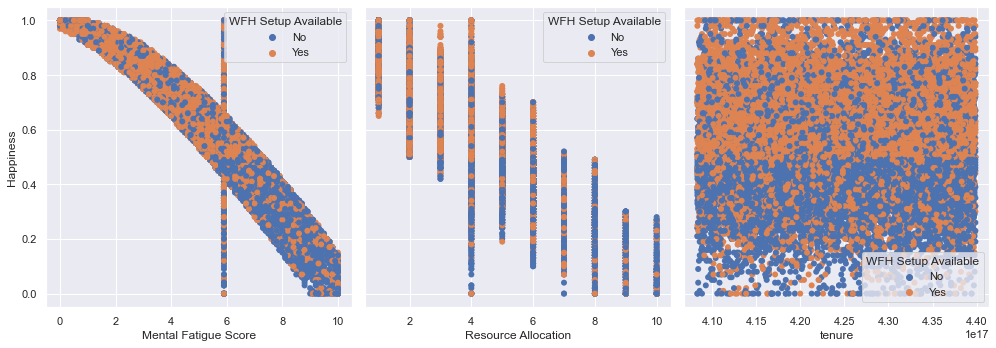

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14,5))
sns.scatterplot(x="Mental Fatigue Score", y="Happiness", hue="WFH Setup Available", data=df_train, linewidth=0.0, ax=ax[0])
sns.scatterplot(x="Resource Allocation", y="Happiness", hue="WFH Setup Available", data=df_train, linewidth=0.0, ax=ax[1])
sns.scatterplot(x="tenure", y="Happiness", hue="WFH Setup Available", data=df_train, linewidth=0.0, ax=ax[2])
plt.tight_layout()
plt.show()

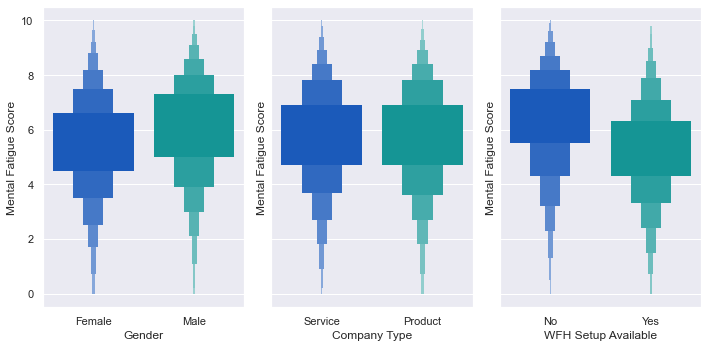

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(10,5))
sns.boxenplot(x="Gender", y="Mental Fatigue Score", data=df_train, palette="winter", linewidth=0.0, ax=ax[0])
sns.boxenplot(x="Company Type", y="Mental Fatigue Score", data=df_train, palette="winter", linewidth=0.0, ax=ax[1])
sns.boxenplot(x="WFH Setup Available", y="Mental Fatigue Score", data=df_train, palette="winter", linewidth=0.0, ax=ax[2])
plt.tight_layout()
plt.show()

In [25]:
list_cols = ['Gender','Company Type','WFH Setup Available']

ce_ohe = ce.OneHotEncoder(cols=list_cols)
df_train = ce_ohe.fit_transform(df_train)
df_train.head()

ce_ohe2 = ce.OneHotEncoder(cols=list_cols)
data_test = ce_ohe2.fit_transform(data_test)

In [26]:
X = df_train.drop(['Happiness','Gender_2','Company Type_2','WFH Setup Available_2','HappyCond'], axis=1)
y = df_train['HappyCond']

In [27]:
data_test = data_test.drop(['Gender_2','Company Type_2','WFH Setup Available_2'], axis=1)

In [28]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [29]:
cols = X.columns
X_test.dtypes

Gender_1                   int64
Company Type_1             int64
WFH Setup Available_1      int64
Designation                int64
Resource Allocation      float64
Mental Fatigue Score     float64
tenure                     int64
dtype: object

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [31]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [32]:
X_train.columns = cols
X_test.columns = cols

In [33]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred= gnb.predict(X_test)
gnb_pred=gnb.predict_proba(X_test)
gnb_pred

array([[9.99855015e-01, 1.44985038e-04],
       [7.06214513e-06, 9.99992938e-01],
       [9.97561101e-01, 2.43889929e-03],
       ...,
       [1.50725953e-02, 9.84927405e-01],
       [9.99822321e-01, 1.77679072e-04],
       [9.81248972e-01, 1.87510282e-02]])

In [34]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9012


In [35]:
df = pd.DataFrame(gnb_pred)
df

,0,1
0,0.999855,0.000145
1,0.000007,0.999993
2,0.997561,0.002439
3,0.997644,0.002356
4,0.938693,0.061307
...,...,...
6483,0.943239,0.056761
6484,0.420531,0.579469
6485,0.015073,0.984927
6486,0.999822,0.000178


In [36]:
c = 0
happinessLevel = {}
for index, row in df.iterrows():
    if row[0]> row[1]:
        happinessLevel[index]= "Unhappy"
    else:
        happinessLevel[index]= "Happy"
        c +=1
        
    print("Employee ID - " +test_EmpId[index]+" - " + happinessLevel[index])
print (c)

Employee ID - fffe31003300390039003000 - Unhappy
Employee ID - fffe31003300310037003800 - Happy
Employee ID - fffe33003400380035003900 - Unhappy
Employee ID - fffe3100370039003200 - Unhappy
Employee ID - fffe32003600390036003700 - Unhappy
Employee ID - fffe3600390032003200 - Happy
Employee ID - fffe3600370032003200 - Happy
Employee ID - fffe32003900390030003000 - Happy
Employee ID - fffe3100370031003000 - Happy
Employee ID - fffe31003500320037003600 - Unhappy
Employee ID - fffe3400370031003100 - Happy
Employee ID - fffe32003800300035003300 - Happy
Employee ID - fffe31003700380037003700 - Happy
Employee ID - fffe33003400300038003900 - Unhappy
Employee ID - fffe33003100300039003600 - Happy
Employee ID - fffe33003400380038003300 - Unhappy
Employee ID - fffe33003400310032003500 - Happy
Employee ID - fffe33003400360032003000 - Unhappy
Employee ID - fffe32003800360033003400 - Unhappy
Employee ID - fffe3600350031003700 - Unhappy
Employee ID - fffe3200310033003500 - Unhappy
Employee ID - fffe3

Employee ID - fffe31003000390033003200 - Unhappy
Employee ID - fffe31003900370031003300 - Happy
Employee ID - fffe31003800360035003300 - Unhappy
Employee ID - fffe3900320039003700 - Happy
Employee ID - fffe33003100360035003100 - Unhappy
Employee ID - fffe32003000380039003400 - Happy
Employee ID - fffe31003600340033003100 - Happy
Employee ID - fffe32003000320031003200 - Unhappy
Employee ID - fffe31003200380030003600 - Happy
Employee ID - fffe31003400300038003600 - Unhappy
Employee ID - fffe31003500350030003700 - Happy
Employee ID - fffe32003700310035003100 - Happy
Employee ID - fffe32003900360030003700 - Happy
Employee ID - fffe32003500330033003300 - Unhappy
Employee ID - fffe3300380035003200 - Unhappy
Employee ID - fffe32003400360036003900 - Happy
Employee ID - fffe3100320031003100 - Happy
Employee ID - fffe32003000310031003600 - Unhappy
Employee ID - fffe32003000360034003600 - Happy
Employee ID - fffe32003100340034003600 - Happy
Employee ID - fffe33003300390031003600 - Happy
Employee 

Employee ID - fffe32003300360035003500 - Unhappy
Employee ID - fffe3100380032003200 - Happy
Employee ID - fffe3300360031003600 - Happy
Employee ID - fffe31003400340033003800 - Happy
Employee ID - fffe31003000350034003600 - Unhappy
Employee ID - fffe33003200310032003300 - Happy
Employee ID - fffe31003800340032003700 - Unhappy
Employee ID - fffe32003600320033003800 - Happy
Employee ID - fffe33003400390035003400 - Happy
Employee ID - fffe320030003200 - Unhappy
Employee ID - fffe3400370039003400 - Happy
Employee ID - fffe31003500350037003900 - Happy
Employee ID - fffe32003600310036003000 - Happy
Employee ID - fffe32003000330037003700 - Happy
Employee ID - fffe33003200310032003800 - Unhappy
Employee ID - fffe3900310030003600 - Happy
Employee ID - fffe3700340038003000 - Unhappy
Employee ID - fffe3100340036003600 - Happy
Employee ID - fffe31003300320038003400 - Unhappy
Employee ID - fffe32003000350036003100 - Happy
Employee ID - fffe3600320038003600 - Happy
Employee ID - fffe33003400360037003

Employee ID - fffe31003900370036003200 - Unhappy
Employee ID - fffe32003100300030003000 - Happy
Employee ID - fffe3800360037003300 - Unhappy
Employee ID - fffe32003600330035003100 - Unhappy
Employee ID - fffe32003700310038003800 - Unhappy
Employee ID - fffe31003700340036003200 - Happy
Employee ID - fffe3900320038003500 - Happy
Employee ID - fffe3300350030003400 - Happy
Employee ID - fffe32003800370030003100 - Happy
Employee ID - fffe32003800330035003800 - Happy
Employee ID - fffe31003700350039003700 - Unhappy
Employee ID - fffe31003300380034003800 - Unhappy
Employee ID - fffe31003900330036003200 - Happy
Employee ID - fffe31003000360033003500 - Unhappy
Employee ID - fffe33003200380039003700 - Happy
Employee ID - fffe32003600390035003800 - Unhappy
Employee ID - fffe3200370036003900 - Unhappy
Employee ID - fffe3700310032003600 - Happy
Employee ID - fffe3600340032003500 - Unhappy
Employee ID - fffe3100350030003000 - Unhappy
Employee ID - fffe32003300380033003500 - Happy
Employee ID - fffe3

Employee ID - fffe32003900330036003300 - Unhappy
Employee ID - fffe32003500380038003700 - Happy
Employee ID - fffe3600330034003800 - Happy
Employee ID - fffe33003400370030003100 - Happy
Employee ID - fffe3300340030003200 - Unhappy
Employee ID - fffe32003300340036003300 - Happy
Employee ID - fffe3900310038003500 - Happy
Employee ID - fffe3600350036003400 - Happy
Employee ID - fffe31003500360039003500 - Happy
Employee ID - fffe3300320034003000 - Happy
Employee ID - fffe31003000300032003300 - Happy
Employee ID - fffe31003000310034003800 - Unhappy
Employee ID - fffe3300350037003000 - Happy
Employee ID - fffe3800360030003800 - Happy
Employee ID - fffe32003100360037003400 - Unhappy
Employee ID - fffe31003900390030003200 - Happy
Employee ID - fffe3100370034003700 - Happy
Employee ID - fffe3200350031003200 - Happy
Employee ID - fffe3200360030003900 - Unhappy
Employee ID - fffe3500390038003000 - Happy
Employee ID - fffe33003100320039003100 - Happy
Employee ID - fffe32003300340039003900 - Happy


Employee ID - fffe3900370033003300 - Happy
Employee ID - fffe31003000360030003600 - Unhappy
Employee ID - fffe32003800300031003500 - Unhappy
Employee ID - fffe32003400390034003600 - Unhappy
Employee ID - fffe33003100360039003100 - Happy
Employee ID - fffe3500350037003600 - Unhappy
Employee ID - fffe390038003700 - Happy
Employee ID - fffe3800390034003100 - Happy
Employee ID - fffe32003900310039003400 - Unhappy
Employee ID - fffe3300390030003500 - Happy
Employee ID - fffe31003100310031003400 - Happy
Employee ID - fffe3900330038003700 - Unhappy
Employee ID - fffe3800370038003800 - Happy
Employee ID - fffe33003200350033003300 - Happy
Employee ID - fffe32003100360037003900 - Happy
Employee ID - fffe31003500330034003100 - Happy
Employee ID - fffe31003600360034003900 - Happy
Employee ID - fffe31003400350037003400 - Happy
Employee ID - fffe33003400350037003100 - Unhappy
Employee ID - fffe32003000390039003100 - Unhappy
Employee ID - fffe31003700390033003800 - Happy
Employee ID - fffe32003900300

Employee ID - fffe33003200350031003100 - Happy
Employee ID - fffe33003100380031003000 - Unhappy
Employee ID - fffe32003900340035003700 - Happy
Employee ID - fffe32003600340035003100 - Unhappy
Employee ID - fffe31003500350031003700 - Unhappy
Employee ID - fffe31003100330035003800 - Happy
Employee ID - fffe32003700370037003700 - Happy
Employee ID - fffe32003500390036003800 - Happy
Employee ID - fffe3700380037003600 - Unhappy
Employee ID - fffe3500340038003900 - Happy
Employee ID - fffe3700360038003800 - Unhappy
Employee ID - fffe31003000310038003300 - Happy
Employee ID - fffe31003100370035003200 - Happy
Employee ID - fffe32003100300039003100 - Unhappy
Employee ID - fffe33003200370033003800 - Happy
Employee ID - fffe3500320038003600 - Happy
Employee ID - fffe3100330034003100 - Happy
Employee ID - fffe3500370037003400 - Happy
Employee ID - fffe31003400340033003500 - Happy
Employee ID - fffe31003300360035003900 - Happy
Employee ID - fffe31003100340036003600 - Happy
Employee ID - fffe3300330

Employee ID - fffe3500300034003400 - Unhappy
Employee ID - fffe380031003600 - Unhappy
Employee ID - fffe350038003000 - Happy
Employee ID - fffe32003700360036003900 - Happy
Employee ID - fffe32003900360035003800 - Happy
Employee ID - fffe3900350038003300 - Unhappy
Employee ID - fffe33003100350030003100 - Happy
Employee ID - fffe32003500320033003300 - Happy
Employee ID - fffe32003100320038003000 - Happy
Employee ID - fffe33003000350034003900 - Happy
Employee ID - fffe31003300300032003200 - Happy
Employee ID - fffe31003900300038003700 - Unhappy
Employee ID - fffe31003300350037003700 - Happy
Employee ID - fffe390039003100 - Happy
Employee ID - fffe33003100340033003500 - Happy
Employee ID - fffe32003200370031003400 - Happy
Employee ID - fffe31003300310035003800 - Happy
Employee ID - fffe31003600360030003200 - Unhappy
Employee ID - fffe33003000300033003900 - Happy
Employee ID - fffe32003400370032003700 - Happy
Employee ID - fffe31003200360036003800 - Unhappy
Employee ID - fffe360033003100390

Employee ID - fffe31003100360032003500 - Unhappy
Employee ID - fffe32003500330033003800 - Unhappy
Employee ID - fffe32003600330030003600 - Unhappy
Employee ID - fffe370031003500 - Happy
Employee ID - fffe31003600350033003100 - Happy
Employee ID - fffe31003900340035003400 - Happy
Employee ID - fffe32003300340033003800 - Happy
Employee ID - fffe3800380039003800 - Happy
Employee ID - fffe3700320038003600 - Happy
Employee ID - fffe32003100390030003500 - Happy
Employee ID - fffe31003400360038003600 - Unhappy
Employee ID - fffe32003300370038003500 - Unhappy
Employee ID - fffe33003100330037003100 - Unhappy
Employee ID - fffe32003600380038003900 - Unhappy
Employee ID - fffe3700320034003300 - Happy
Employee ID - fffe32003800330031003800 - Happy
Employee ID - fffe31003900340037003000 - Unhappy
Employee ID - fffe3600340030003100 - Happy
Employee ID - fffe31003400300037003900 - Happy
Employee ID - fffe32003700380031003200 - Unhappy
Employee ID - fffe31003800360030003700 - Unhappy
Employee ID - fff

Employee ID - fffe32003100350035003400 - Happy
Employee ID - fffe33003400390030003900 - Unhappy
Employee ID - fffe32003100380038003200 - Happy
Employee ID - fffe31003600380031003700 - Happy
Employee ID - fffe33003400330033003400 - Happy
Employee ID - fffe31003800300030003600 - Happy
Employee ID - fffe3200360039003800 - Happy
Employee ID - fffe33003300330032003400 - Unhappy
Employee ID - fffe31003700380031003900 - Happy
Employee ID - fffe32003100380039003900 - Unhappy
Employee ID - fffe3200350032003700 - Unhappy
Employee ID - fffe32003700310032003400 - Unhappy
Employee ID - fffe31003100310034003800 - Unhappy
Employee ID - fffe31003900380039003800 - Happy
Employee ID - fffe32003400380034003400 - Happy
Employee ID - fffe3500330034003200 - Unhappy
Employee ID - fffe32003100320030003800 - Happy
Employee ID - fffe32003200350036003000 - Unhappy
Employee ID - fffe31003900300030003800 - Unhappy
Employee ID - fffe31003400380031003000 - Happy
Employee ID - fffe33003200320033003900 - Happy
Employe

Employee ID - fffe3300330039003000 - Unhappy
Employee ID - fffe32003400330035003100 - Unhappy
Employee ID - fffe33003400390033003200 - Unhappy
Employee ID - fffe32003500300033003400 - Happy
Employee ID - fffe31003900370034003700 - Happy
Employee ID - fffe32003200340037003000 - Unhappy
Employee ID - fffe31003700370031003900 - Happy
Employee ID - fffe33003400350036003000 - Happy
Employee ID - fffe32003800390032003000 - Happy
Employee ID - fffe31003100380030003200 - Unhappy
Employee ID - fffe3500 - Happy
Employee ID - fffe31003300300036003400 - Happy
Employee ID - fffe31003700310039003600 - Happy
Employee ID - fffe380038003100 - Unhappy
Employee ID - fffe32003900310034003200 - Unhappy
Employee ID - fffe32003800350032003100 - Unhappy
Employee ID - fffe3900360038003000 - Happy
Employee ID - fffe3900370037003600 - Happy
Employee ID - fffe33003300320031003500 - Happy
Employee ID - fffe32003600340033003600 - Happy
Employee ID - fffe32003200320034003800 - Happy
Employee ID - fffe330033003100380

Employee ID - fffe31003000380038003400 - Unhappy
Employee ID - fffe3800360036003600 - Happy
Employee ID - fffe3500360033003000 - Happy
Employee ID - fffe31003800310034003000 - Unhappy
Employee ID - fffe3100310031003900 - Happy
Employee ID - fffe31003600310037003200 - Unhappy
Employee ID - fffe32003400310035003900 - Unhappy
Employee ID - fffe32003600340032003600 - Unhappy
Employee ID - fffe3500370035003700 - Happy
Employee ID - fffe32003600300037003600 - Happy
Employee ID - fffe32003200310034003300 - Happy
Employee ID - fffe32003700380030003100 - Unhappy
Employee ID - fffe3800320034003700 - Happy
Employee ID - fffe32003000380036003600 - Unhappy
Employee ID - fffe33003200340031003400 - Happy
Employee ID - fffe32003000310030003800 - Unhappy
Employee ID - fffe340036003800 - Happy
Employee ID - fffe32003000320033003500 - Unhappy
Employee ID - fffe3700380039003400 - Happy
Employee ID - fffe3800310036003800 - Unhappy
Employee ID - fffe3600360036003400 - Happy
Employee ID - fffe320036003000350

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Negative(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negative(FN) = ', cm[1,0])

print('\nTrue Positive(TP) = ', cm[1,1])


Confusion matrix

 [[2268  287]
 [ 354 3579]]

True Negative(TN) =  2268

False Positives(FP) =  287

False Negative(FN) =  354

True Positive(TP) =  3579


In [38]:
y_test.value_counts()

1    3933
0    2555
Name: HappyCond, dtype: int64

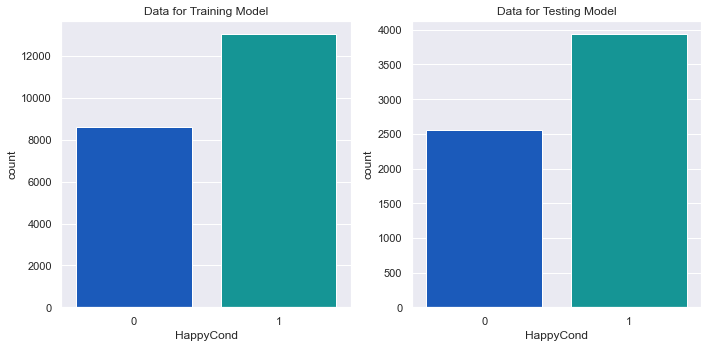

0 : Not Happy
1 : Happy


In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5))
sns.countplot(df_train["HappyCond"], palette="winter", ax=ax[0]).set_title("Data for Training Model")
sns.countplot(y_test, palette="winter", ax=ax[1]).set_title("Data for Testing Model")
plt.tight_layout()
plt.show()
print("0 : Not Happy")
print("1 : Happy")

In [40]:
values = y_test.value_counts().keys().tolist()
counts = y_test.value_counts().tolist()
for i in range(len(values)):
    if values[i] == 0:
        print("Number of 'NOT HAPPY' Employees are: "+str(counts[i]))
    else:
        print("Number of 'HAPPY' Employees are: "+str(counts[i]))

Number of 'HAPPY' Employees are: 3933
Number of 'NOT HAPPY' Employees are: 2555
